## Дискримінантний аналіз

Див. також

1) https://www.statology.org/linear-discriminant-analysis-in-python/

2) https://sebastianraschka.com/Articles/2014_python_lda.html

3) https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Приклад 1. Example 8.2 Rencher

В цій таблиці наведені максимальна міцність $y_1$  і межа текучості $y_1$  для сталі, прокатаної при двох температурах $T_1$ та $T_2$.  Наша задача- вдало розділити дані на 2 групи. 

In [2]:
Temp = np.loadtxt("T8_1_STEEL.DAT", dtype=float)
print(Temp)
Temp1 = Temp[:5,1:].T #  T1
Temp2 = Temp[5:,1:].T  # Table of temperatures  T2
# np.array(Temp1).T
# Temp['group'] = Temp[:,0]

[[ 1. 33. 60.]
 [ 1. 36. 61.]
 [ 1. 35. 64.]
 [ 1. 38. 63.]
 [ 1. 40. 65.]
 [ 2. 35. 57.]
 [ 2. 36. 59.]
 [ 2. 38. 59.]
 [ 2. 39. 61.]
 [ 2. 41. 63.]
 [ 2. 43. 65.]
 [ 2. 41. 59.]]


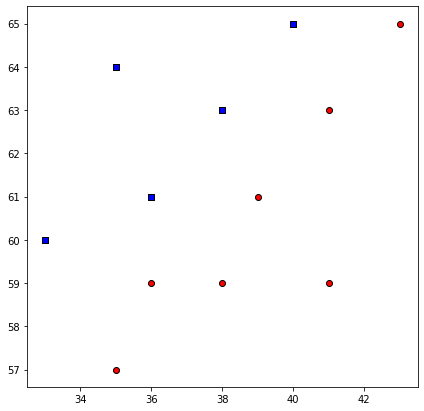

In [3]:
#Plot the data
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)


# scatter малює лише точки 
# marker='s' малює  квадрати,'o' - коло
ax0.scatter(Temp1[0],Temp1[1],marker='s',c='blue',edgecolor='black')

# додаємо точки 
ax0.scatter(Temp2[0],Temp2[1],marker='o',c='red',edgecolor='black')  

plt.show()

Видно, що дані можна розділити на 2 групи. Зробимо це через дискримінантну функцію
$$
z = a'y, \quad a = S_{pl}^{-1} (\bar{y}_1 - \bar{y}_2). 
$$

Обчислюємо коваріаційні матриці:

In [4]:
S1 = np.cov(Temp1)
S2 = np.cov(Temp2)
print(S1)
print(S2)

[[7.3 4.2]
 [4.2 4.3]]
[[8.33333333 6.66666667]
 [6.66666667 7.61904762]]


In [5]:
d1 = len(Temp1.T) # кількість елементів в T1
d2 = len(Temp2.T) # кількість елементів в   T2

print(d1,d2)

y1 = np.mean(Temp1, axis=1)
y2 = np.mean(Temp2, axis=1)

print(y1,y2)

5 7
[36.4 62.6] [39.         60.42857143]


In [6]:
Spl = ((d1-1)*S1+ (d2-1)*S2)/(d1+d2-2)   #  зважена коваріація

a = np.linalg.inv(Spl)@(y1-y2)  # a
print(a)

[-1.63337671  1.81977879]


Обчислимо тепер $z_1 = a' y_1$ та  $z_2 = a' y_2$. 

In [7]:
print(Temp1)
z1 = Temp1.T @ a
print(z1)

z2 = Temp2.T @ a

[[33. 36. 35. 38. 40.]
 [60. 61. 64. 63. 65.]]
[55.28529603 52.2049447  59.29765777 52.57774886 52.95055303]


Розділимо  z  на 2 групи (z1 та z2) відповідно до того, чи більше ці значення
zmean або менші

In [9]:
zmean = 0.5*(np.mean(z1)+np.mean(z2)) # середнє значення

t = Temp[:,1:]@a

Ділимо на 2 групи,  1  та   2

In [10]:
def group(x): 
    y=[]
    for i in range(len(x)):
        if (x[i] > zmean): 
            y = np.append(y,1)
        else: y = np.append(y,2)
    return y
print(group(t))

[1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.]


Можна ще порахувати матрицю невідповідностей (далі буде в розділі 'класифікація'). 

### Приклад 2.   8.4.1 з Rencher

В таблиці знаходяться вимірювання параметрів шоломів  в залежності від того, до якої групи відноситься людина (гравець шкільної команди, гравець команди коледжа, або людина взагалі не грає в  футбол).  

In [11]:
Foot = np.loadtxt("T8_3_FOOTBALL.DAT", dtype=float)
print(Foot[:10,])

[[ 1.   13.5  57.15 19.5  12.5  14.   11.  ]
 [ 1.   15.5  58.42 21.   12.   16.   12.  ]
 [ 1.   14.5  55.88 19.   10.   13.   12.  ]
 [ 1.   15.5  58.42 20.   13.5  15.   12.  ]
 [ 1.   14.5  58.42 20.   13.   15.5  12.  ]
 [ 1.   14.   60.96 21.   12.   14.   13.  ]
 [ 1.   15.   58.42 19.5  13.5  15.5  13.  ]
 [ 1.   15.   58.42 21.   13.   14.   13.  ]
 [ 1.   15.5  59.69 20.5  13.5  14.5  12.5 ]
 [ 1.   15.5  59.69 20.5  13.   15.   13.  ]]


In [12]:
X = Foot[:, 1:]  #  змінні 
y = Foot[:,0]    #  перша колонка, номери груп
# print(X)

In [13]:
np.sum(X[:10,], axis = 0)  # сумуємо по стовбчиках в Х

array([148.5 , 585.47, 202.  , 126.  , 146.5 , 123.5 ])

In [16]:
model = LinearDiscriminantAnalysis()   #  задаємо модель 
model.fit(X,y)                         #  підгонка моделі

data_plot = model.fit(X, y).transform(X) # малюємо картинку, отриману після перетворення
target_names = y

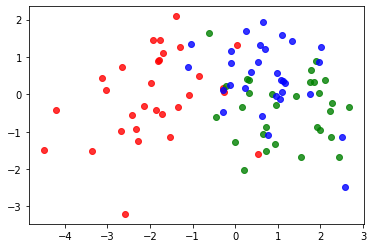

In [17]:
plt.figure()
colors = ['red', 'green', 'blue']   # задаємо список кольорів 

for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
             label = target_name)

Що робить data_plot = model.fit(X, y).transform(X): перераховує дані в нових координатах

In [18]:
X_bar = np.mean(X,0)                   # взяли середнє по стовбчикам
X_centr =  X - X_bar                   # центрували 
b = np.array(model.scalings_ )         # власні вектори E^{-1}H, не нормовані

z =  np.dot(X_centr,b)                 # дискримінантна функція (те саме: data_plot) 
# print(data_plot)

In [29]:
dir(model)  # атрібути

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_max_components',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_solve_eigen',
 '_solve_lsqr',
 '_solve_svd',
 '_validate_data',
 'classes_',
 'coef_',
 'covariance_estimator',
 'decision_function',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_params',
 'intercept_',
 'means_',
 'n_components',
 'n_features_in_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'priors_',
 'scalings_',
 'score',
 'set_par

Будемо округляти все до 2го знаку: 

In [17]:
np.set_printoptions(2)
print(model.priors_)     # Попередній розподіл: всі групи рівноцінні 
print(model.scalings_)   # Перші 2 власних вектори E^{-1}H, не нормовані
                         # перші 2- тому що у всіх інших власні числа комплексні
print(model.means_)      # Середні по колонкам V2 -- V7

[0.33 0.33 0.33]
[[ 9.48e-01  1.41e+00]
 [-3.64e-03 -5.13e-04]
 [-6.44e-03 -2.86e-02]
 [-6.47e-01  5.40e-01]
 [-5.04e-01 -3.84e-01]
 [-8.29e-01 -1.53e+00]]
[[15.2  58.94 20.11 13.08 14.73 12.27]
 [15.42 57.38 19.8  10.08 13.45 11.94]
 [15.58 57.77 19.81 10.95 13.7  11.8 ]]


Знайдемо відношення $\frac{\lambda_1}{\lambda_1+\lambda_2}$. Самих власних чисел в аттрібутах немає, є лише це відношення (explained_variance_ratio_). 

In [47]:
print(model.explained_variance_ratio_)

[0.94 0.06]


In [45]:
print(model.coef_)

[[-1.9   0.01  0.01  1.2   0.99  1.67]
 [ 0.57 -0.    0.   -0.96 -0.44 -0.39]
 [ 1.32 -0.   -0.02 -0.25 -0.54 -1.29]]


Для того, щоб знайти дискримінантні функції, нам потрібно знайти власні числа та власні вектори матриці $E^{-1}H$. 

Наведемо приклад обчислення матриць $E$ та $H$. При цьому ми використаємо формули 
\begin{equation}\label{E}
E= \sum_{ij} y_{ij}y_{ij}'- \sum_{i=1}^k \frac{1}{n}\bar{y}_{i\cdot} \bar{y}_{i\cdot}'. 
\end{equation}
та  
\begin{equation}\label{H}
H= \sum_{i=1}^k \frac{1}{n}\bar{y}_{i\cdot} \bar{y}_{i\cdot}'- \frac{1}{kn}y_{\cdot\cdot}y_{\cdot\cdot}'
\end{equation}

In [18]:
p = 6   # розмірність 
n = 30  # кількість спостережень в групі
k = 3   # кількість груп

Порахуємо суму  
$$
S_1 =\sum_{i=1}^k \sum_{j=1}^n y_{ij}y_{ij}',
$$
$n=30$, $k=3$ $len(y)= n*k = 90$. 

In [19]:
S1 = np.zeros(shape=(6,6))
for i in range(len(y)): 
    S1+=(np.array(X[i,:]).reshape(6,1))@(np.array(X[i,:]).reshape(1,6))
print(S1)

[[ 21383.84  80471.09  27603.35  15752.77  19354.57  16655.3 ]
 [ 80471.09 303376.09 104064.45  59512.84  72975.87  62748.25]
 [ 27603.35 104064.45  35716.09  20393.33  25031.63  21523.97]
 [ 15752.77  59512.84  20393.33  11885.51  14376.49  12306.24]
 [ 19354.57  72975.87  25031.63  14376.49  17623.63  15092.98]
 [ 16655.3   62748.25  21523.97  12306.24  15092.98  13005.66]]


Рахуємо суми всередині групи 
$$
S_2= \frac{1}{n}\sum_{i=1}^k y_{i \cdot} y_{i \cdot}'
$$

In [48]:
# 1. Середнє по групам і по стовбчикам, тобто y_{i \cdot}
g = np.zeros(shape =(3,6))
for i in range(3):
    g[i,:]+= np.sum(X[i*30: (i+1)*30,:], axis = 0)
print(g)

[[ 456.   1768.11  603.25  392.5   442.    368.  ]
 [ 462.6  1721.39  594.1   302.4   403.6   358.3 ]
 [ 467.4  1733.1   594.3   328.4   410.9   354.1 ]]


In [21]:
# 2. рахуємо скалярний добуток і сумуємо
B= np.zeros(shape=(6,6))
for i in range(3): 
    B+=  (np.array(g[i,:]).reshape((6,1)))  @ (np.array(g[i,:]).reshape((1,6)))
S2 = B/30
print(S2)

[[ 21346.58  80420.8   27589.62  15745.48  19343.73  16635.46]
 [ 80420.8  303101.07 103975.72  59456.05  72946.28  62704.31]
 [ 27589.62 103975.72  35668.6   20386.65  25020.44  21510.12]
 [ 15745.48  59456.05  20386.65  11778.29  14349.11  12302.55]
 [ 19343.73  72946.28  25020.44  14349.11  17569.86  15092.19]
 [ 16635.46  62704.31  21510.12  12302.55  15092.19  12972.99]]


Тоді $E= S_1 - S_2$. 

In [22]:
E = S1-S2
print(E)

[[ 37.26  50.28  13.74   7.29  10.84  19.84]
 [ 50.28 275.02  88.74  56.79  29.59  43.94]
 [ 13.74  88.74  47.5    6.68  11.19  13.84]
 [  7.29  56.79   6.68 107.22  27.38   3.69]
 [ 10.84  29.59  11.19  27.38  53.77   0.79]
 [ 19.84  43.94  13.84   3.69   0.79  32.67]]


Тепер перейдемо до матриці $Н$: 

In [23]:
y_2dot= np.sum(g,axis=0)  # рахуємо y_{dot dot}
y_2dot

array([1386.  , 5222.6 , 1791.65, 1023.3 , 1256.5 , 1080.4 ])

In [24]:
# рахуємо скалярний добуток 
D = (np.array(y_2dot.reshape(6,1)))@(np.array(y_2dot.reshape(1,6)))
# і ділимо на k * n = 90
D/90   

array([[ 21344.4 ,  80428.04,  27591.41,  15758.82,  19350.1 ,  16638.16],
       [ 80428.04, 303061.68, 103967.46,  59380.96,  72913.3 ,  62694.41],
       [ 27591.41, 103967.46,  35666.77,  20371.06,  25013.42,  21507.76],
       [ 15758.82,  59380.96,  20371.06,  11634.92,  14286.41,  12284.15],
       [ 19350.1 ,  72913.3 ,  25013.42,  14286.41,  17542.14,  15083.58],
       [ 16638.16,  62694.41,  21507.76,  12284.15,  15083.58,  12969.6 ]])

In [25]:
#  тепео остаточно знаходимо Н: 
H= B/30- D/90
H

array([[  2.18,  -7.24,  -1.79, -13.34,  -6.37,  -2.7 ],
       [ -7.24,  39.4 ,   8.26,  75.09,  32.98,   9.9 ],
       [ -1.79,   8.26,   1.82,  15.59,   7.01,   2.36],
       [-13.34,  75.09,  15.59, 143.36,  62.7 ,  18.4 ],
       [ -6.37,  32.98,   7.01,  62.7 ,  27.72,   8.6 ],
       [ -2.7 ,   9.9 ,   2.36,  18.4 ,   8.6 ,   3.39]])

In [26]:
# власні числа та власні вектори E^{-1}H
print(np.linalg.eig(np.linalg.inv(E)@ H))  # тут власні вектори вже нормовані!  В model.scalings_  не нормовані

(array([ 1.92e+00,  1.16e-01, -2.14e-12,  1.80e-13, -6.83e-14,  4.18e-14]), array([[ 6.31e-01, -6.45e-01,  2.42e-01,  5.29e-02, -7.53e-01,  2.47e-01],
       [-2.42e-03,  2.35e-04, -4.74e-01, -2.67e-02,  1.34e-02, -7.87e-02],
       [-4.28e-03,  1.31e-02,  8.19e-01, -6.64e-01, -1.47e-01, -5.64e-01],
       [-4.31e-01, -2.48e-01,  1.89e-01, -2.07e-01,  1.81e-01,  2.06e-01],
       [-3.36e-01,  1.76e-01, -4.27e-02,  7.10e-01, -4.24e-01, -3.76e-01],
       [-5.51e-01,  7.01e-01,  8.94e-02, -9.46e-02, -4.45e-01,  6.57e-01]]))
